In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with feature names
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the species column using target values
df['species'] = iris.target

# Map target values to actual species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df=df.iloc[:,1:]

In [5]:
df.head()

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder=LabelEncoder()

In [8]:
df['species']=encoder.fit_transform(df['species'])

In [9]:
df.head()

,sepal width (cm),petal length (cm),petal width (cm),species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [10]:
df=df[df['species']!=0][['sepal width (cm)','petal length (cm)','species']]

In [11]:
df.head()

,sepal width (cm),petal length (cm),species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

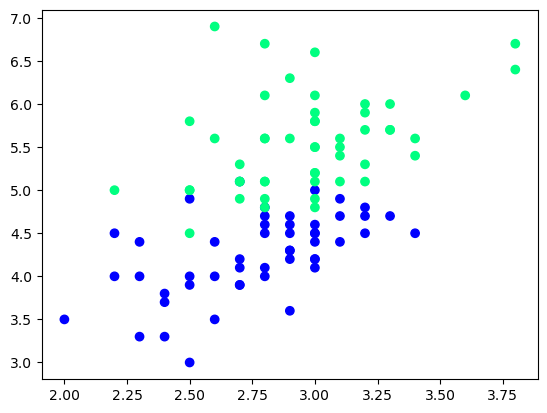

In [14]:
plt.scatter(df['sepal width (cm)'],df['petal length (cm)'],c=df['species'],cmap='winter')

In [15]:
#Taking only 10 rows for training
df=df.sample(100)
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [16]:
df_train

,sepal width (cm),petal length (cm),species
94,2.7,4.2,1
101,2.7,5.1,2
79,2.6,3.5,1
59,2.7,3.9,1
95,3.0,4.2,1
102,3.0,5.9,2
143,3.2,5.9,2
63,2.9,4.7,1
50,3.2,4.7,1
82,2.7,3.9,1


In [17]:
df_val

,sepal width (cm),petal length (cm),species
115,3.2,5.3,2
141,3.1,5.1,2
100,3.3,6.0,2
114,2.8,5.1,2
97,2.9,4.3,1


In [18]:
df_test

,sepal width (cm),petal length (cm),species
96,2.9,4.2,1
66,3.0,4.5,1
135,3.0,6.1,2
138,3.0,4.8,2
122,2.8,6.7,2


In [19]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

In [20]:
X_test

array([[3.2, 5.3],
       [3.1, 5.1],
       [3.3, 6. ],
       [2.8, 5.1],
       [2.9, 4.3]])

In [21]:
y_test

array([2, 2, 2, 2, 1])

## Case1:Bagging

In [23]:
# Data for tree1
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [24]:
df_bag

,sepal width (cm),petal length (cm),species
143,3.2,5.9,2
82,2.7,3.9,1
101,2.7,5.1,2
94,2.7,4.2,1
143,3.2,5.9,2
101,2.7,5.1,2
94,2.7,4.2,1
101,2.7,5.1,2


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score


In [26]:
df_bag1=DecisionTreeClassifier()

In [29]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print("Accuracy:",accuracy_score(y_test,y_pred))

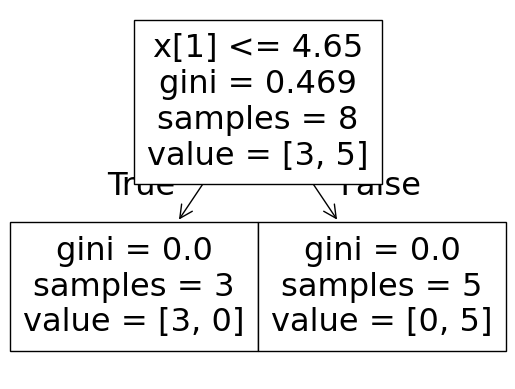

C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


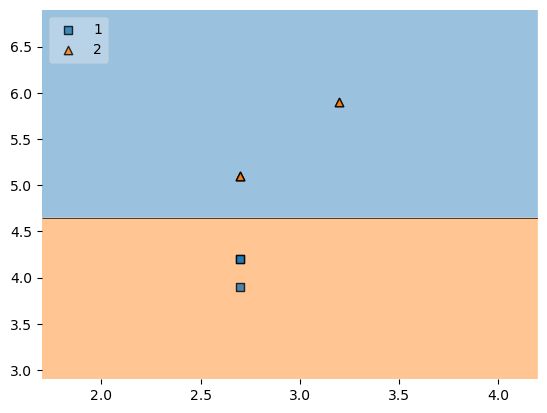

In [30]:
evaluate(df_bag1,X,y)

In [31]:
# Data for tree2
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [32]:
df_bag2=DecisionTreeClassifier()

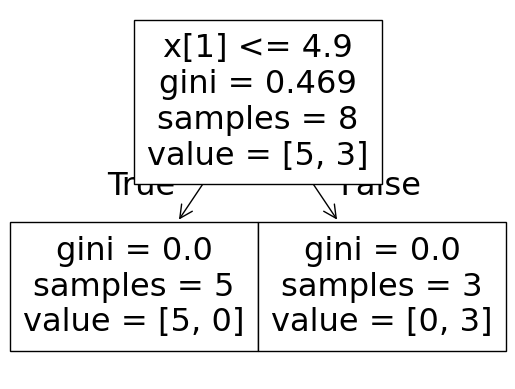

C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


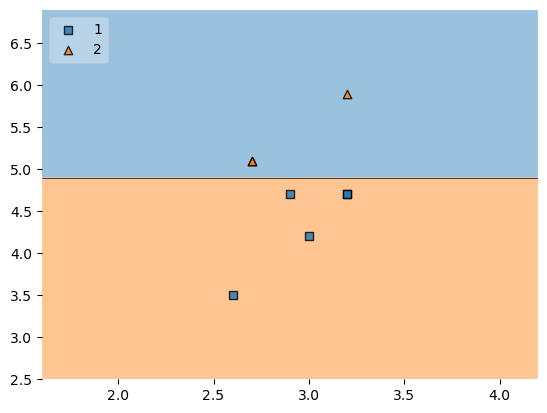

In [33]:
evaluate(df_bag2,X,y)

In [34]:
# Data for tree3
df_bag=df_train.sample(8,replace=True)
X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [35]:
df_bag3=DecisionTreeClassifier()

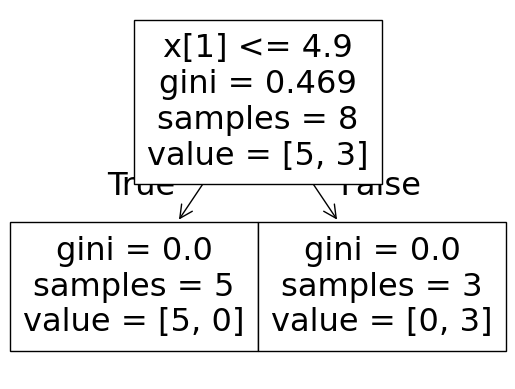

C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


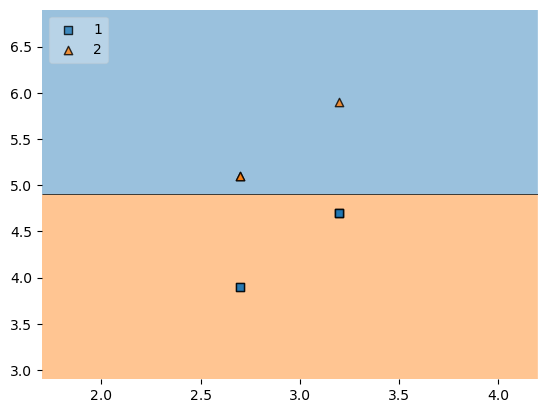

In [36]:
evaluate(df_bag3,X,y)

## Predict

In [37]:
df_test

,sepal width (cm),petal length (cm),species
96,2.9,4.2,1
66,3.0,4.5,1
135,3.0,6.1,2
138,3.0,4.8,2
122,2.8,6.7,2


In [39]:
print("predictor 1",df_bag1.predict(np.array([2.9,4.2]).reshape(1,2)))
print("predictor 2",df_bag2.predict(np.array([2.9,4.2]).reshape(1,2)))
print("predictor 3",df_bag3.predict(np.array([2.9,4.2]).reshape(1,2)))

predictor 1 [1]
predictor 2 [1]
predictor 3 [1]


C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
print("predictor 1",df_bag1.predict(np.array([3.0,6.1]).reshape(1,2)))
print("predictor 2",df_bag2.predict(np.array([3.0,6.1]).reshape(1,2)))
print("predictor 3",df_bag3.predict(np.array([3.0,6.1]).reshape(1,2)))

predictor 1 [2]
predictor 2 [2]
predictor 3 [2]


C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\AS\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Types of Bagging

## 1)Pasting

In [41]:
df_train.sample(8)

,sepal width (cm),petal length (cm),species
79,2.6,3.5,1
50,3.2,4.7,1
82,2.7,3.9,1
101,2.7,5.1,2
63,2.9,4.7,1
94,2.7,4.2,1
143,3.2,5.9,2
102,3.0,5.9,2


## 2)Random subspaces

In [42]:
df_train.sample(2,replace=True,axis=1)

,species,sepal width (cm)
94,1,2.7
101,2,2.7
79,1,2.6
59,1,2.7
95,1,3.0
102,2,3.0
143,2,3.2
63,1,2.9
50,1,3.2
82,1,2.7


In [43]:
df_train.sample(2,replace=True,axis=1)

,petal length (cm),sepal width (cm)
94,4.2,2.7
101,5.1,2.7
79,3.5,2.6
59,3.9,2.7
95,4.2,3.0
102,5.9,3.0
143,5.9,3.2
63,4.7,2.9
50,4.7,3.2
82,3.9,2.7


## 3)Random Patches

In [44]:
df_train.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal width (cm),species
101,2.7,2
102,3.0,2
50,3.2,1
101,2.7,2
143,3.2,2
143,3.2,2
82,2.7,1
143,3.2,2
